## Statistics Method: Assignment 1
### Bioinformatics

In [1]:
echo "# Statistical_Assignment" >> README.md
### test github
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/AriesJUN0410/Statistical_Assignment.git
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-1-5708412524e1>, line 1)

In [ ]:
# 4 (1) Examine the data. Use plots to examine the relation between each predictor variable with Y one-by-one.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 3000x3000 with 0 Axes>

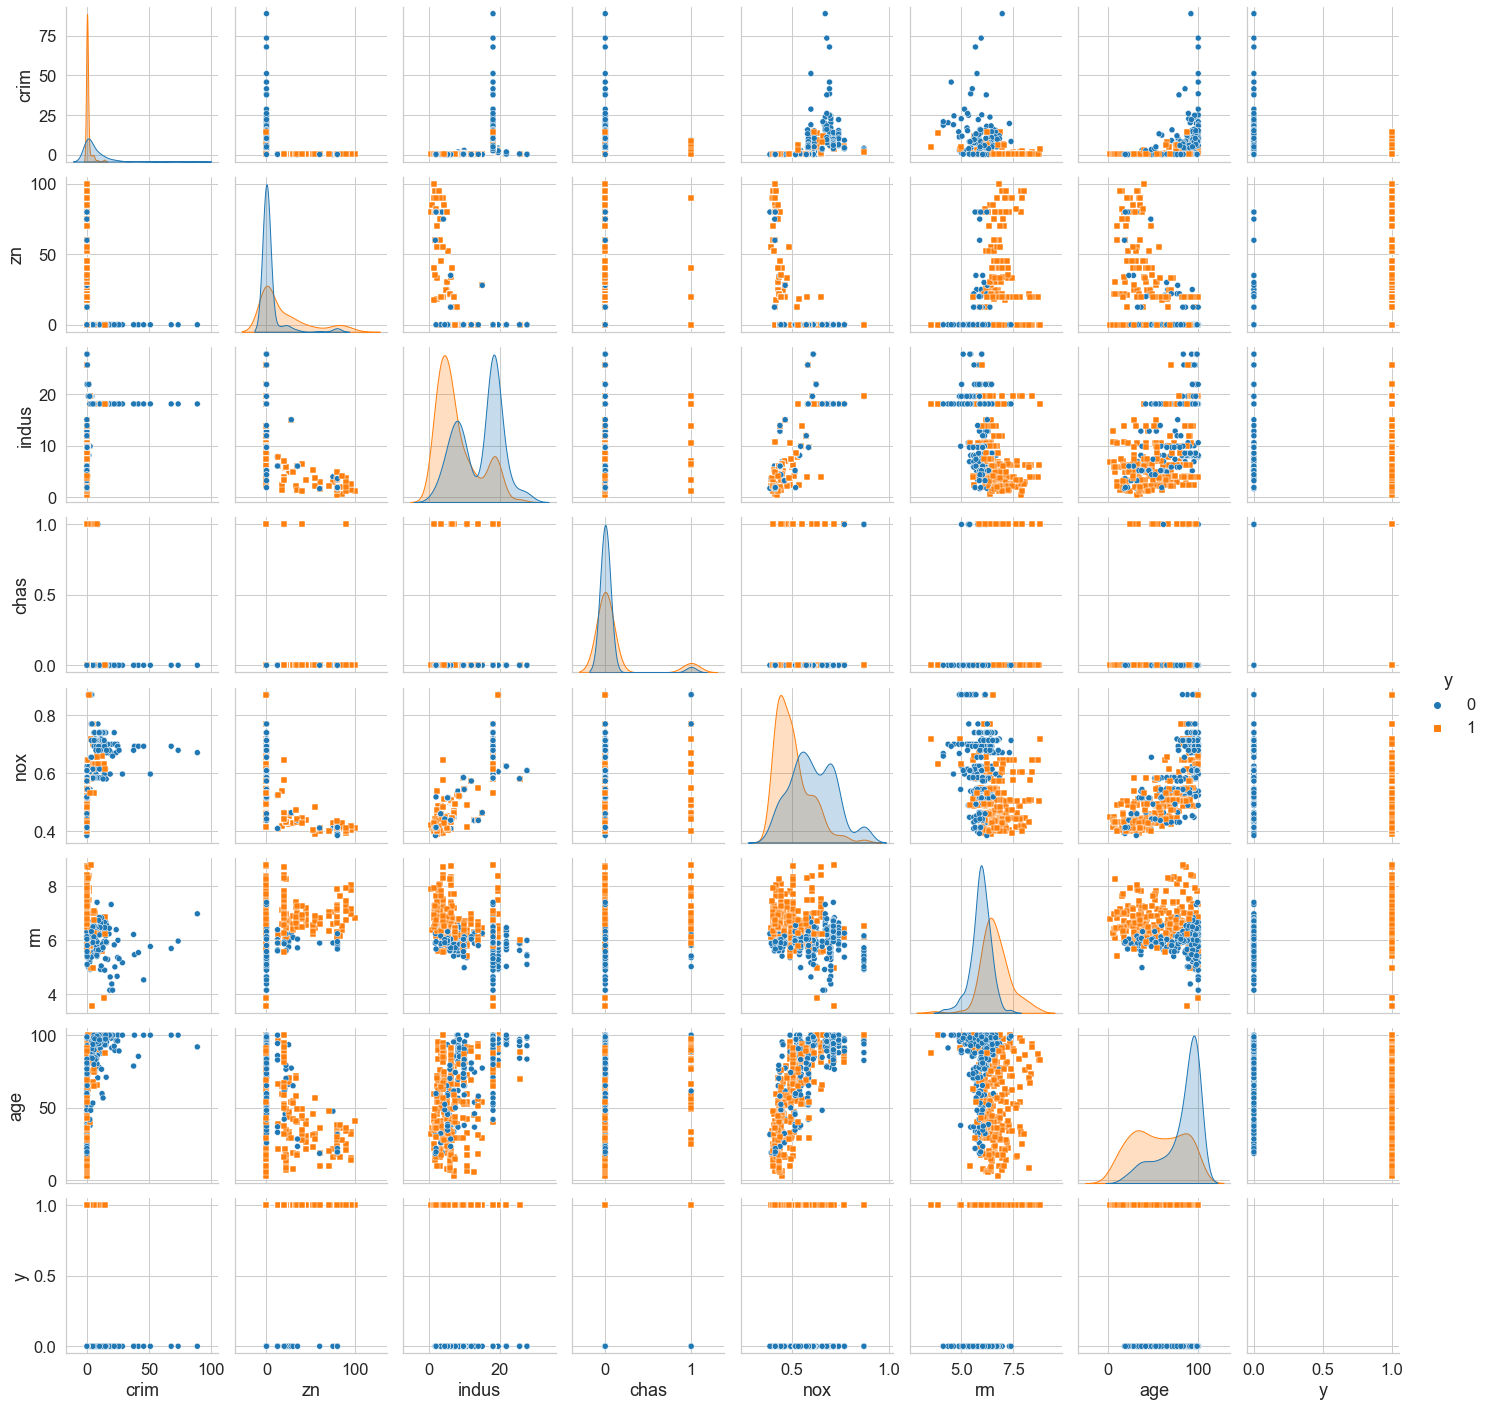

<Figure size 432x288 with 0 Axes>

In [252]:
dataset = pd.read_csv("boston.txt",delimiter="\t") # transfer txt to csv
dataset.to_csv("boston.csv", encoding='utf-8', index=False)

plt.figure(figsize=(30,30),dpi=100)  # set the plot
dataset_p1=dataset.drop(dataset.iloc[:,7:13],axis=1) # choose the first 7 variable and sample y
sns.set_context('notebook',font_scale=1.5) #set the axis font size of the subplot
sns.pairplot(data=dataset,vars=dataset_p1,hue='y',diag_kind="kde",markers=['o','s']) #plot each variables with each other and sample Y

plt.show()
plt.savefig('dataset_p1.png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 3000x3000 with 0 Axes>

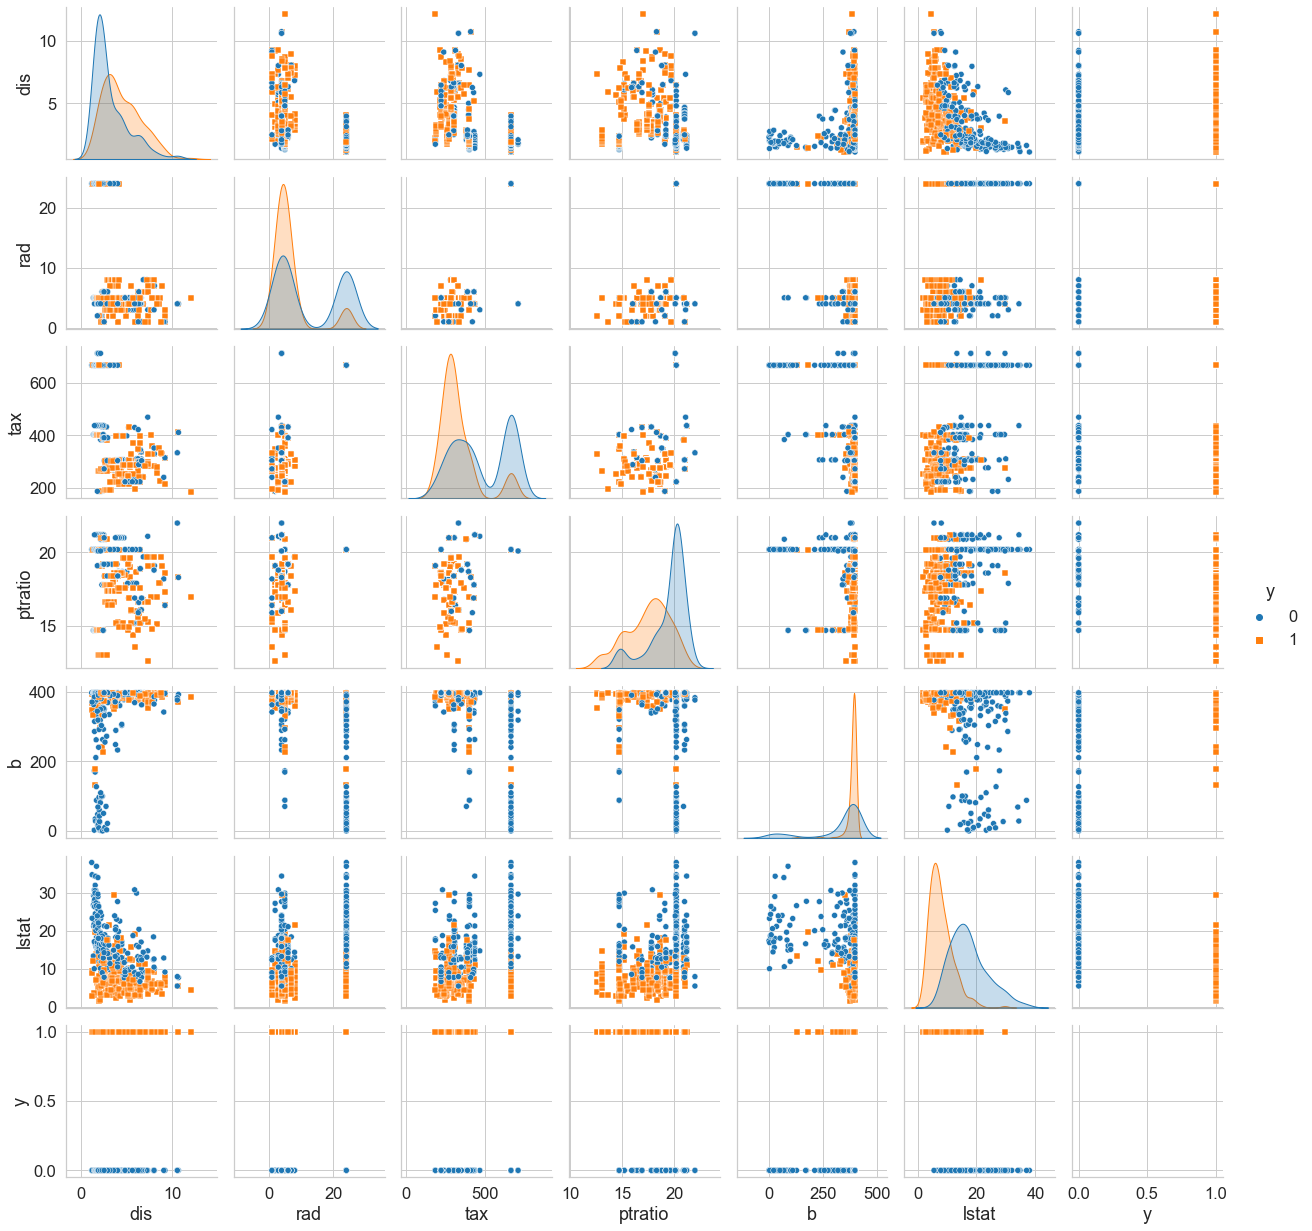

<Figure size 432x288 with 0 Axes>

In [251]:
plt.figure(figsize=(30,30),dpi=100)
sns.set_context('notebook',font_scale=1.5)
sns.pairplot(data=dataset,vars=dataset.iloc[:,7:14],hue='y',diag_kind="kde",markers=['o','s']) # plot the last 6 variables with sample Y

plt.show()
plt.savefig('dataset_p2.png')

In [5]:
# 4 (2) Run a logistic regression with all variables. Interpret the resulting betas for the predictors “chas” and “tax”
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df=pd.read_csv("boston.csv") # read dataset
# print(df)

In [6]:
x_data = df.iloc[1:,:-1] #except the sample column
y_data = df.iloc[1:,-1]
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=1) # Split the dataset
#do the logistic regression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
LR_predictions = model_LR.predict(X_test)
LR_report = classification_report(y_test,LR_predictions)
print("LogisticRegression:\n",LR_report)
# print(LR_report)
print("-"*100)
print(model_LR.coef_)

LogisticRegression:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        75
           1       0.85      0.83      0.84        77

    accuracy                           0.84       152
   macro avg       0.84      0.84      0.84       152
weighted avg       0.84      0.84      0.84       152

----------------------------------------------------------------------------------------------------
[[-0.18789282  0.05014152 -0.01774427  0.46665741  0.03408712  1.54242063
  -0.03225564 -0.9752461   0.13595494 -0.00631245 -0.16526235  0.0099515
  -0.25389884]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#chas
coef_chas = model_LR.coef_[:,3] #Pick the beta value of chas
print('beta value of chas is:',coef_chas)
#tax
coef_tax = model_LR.coef_[:,9] #Pick the beta value of tax
print('beta value of tax is:',coef_tax)

beta value of chas is: [0.46665741]
beta value of tax is: [-0.00631245]


In [11]:
# 4 (5)	Run lasso variable selection. What does the plot of betas versus lambda look like?
# 4 (6) Select the best lambda using cross-validation. At the best lambda, which variables are selected?
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,RidgeCV,LassoLarsCV, LassoLarsIC,Lasso,LassoCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

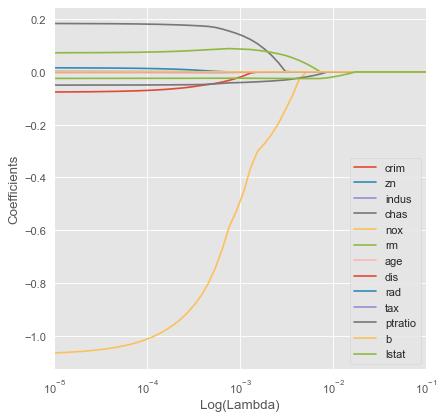

In [12]:
x_data = df.iloc[1:,:-1]
y_data = df.iloc[1:,-1]
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=1)

#set different lambda value
Lambdas=np.logspace(-5,10,200)
# store the coefficients value
lasso_coefficients=[]
for Lambda in Lambdas:
    lasso=Lasso(alpha=Lambda,normalize=True)
    lasso.fit(X_train,y_train)
    lasso_coefficients.append(lasso.coef_)
# plot the cruve
plt.figure(figsize=(6,6),dpi=80)
plt.style.use('ggplot')
plt.plot(Lambdas,lasso_coefficients)
plt.xlim(pow(10,-5),pow(10,-1))
# log the x axis
plt.xscale('log')
plt.xlabel('Log(Lambda)')
plt.ylabel('Coefficients')
plt.legend(df.columns[:-1])

In [13]:
#CROSS VALIDATION
lasso_cv=LassoCV(alphas=Lambdas,normalize=True,max_iter=10000,cv=10)
lasso_cv.fit(X_train,y_train)
print('alpha:',lasso_cv.alpha_)

# modeling base on the best lambda
lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)  # alpha is the cv value
lasso.fit(X_train,y_train)
#regression coefficient
# print('regression coefficient:\n',pd.Series(index=['Intercept']+X_train.columns.tolist(),
#                 data=[lasso.intercept_]+lasso.coef_.tolist()))

#evaluate the model
lasso_pred=lasso.predict(X_test)
#MSE
MSE=mean_squared_error(y_test,lasso_pred)
print('MSE:',MSE)

alpha: 4.7686116977144744e-05
MSE: 0.10932434196739028


In [14]:
# Use AIC to choose cross validantion value alpha
X2=x_data
Y2=y_data
model_aic = LassoLarsIC(criterion='aic',normalize=False)  #criterion
model_aic.fit(X2,Y2)
alpha_aic_ = model_aic.alpha_  #the best alpha value
coefs_values=np.append([model_aic.intercept_],model_aic.coef_)  # regression coef
coefs_names=np.append(['Intercept'],df.columns[:-1])
df_coefs=pd.DataFrame({"names":coefs_names.tolist(),"values":coefs_values.tolist()})
# print('coef list:',df_coefs)
# print('\nAlpha value:',alpha_aic_)
for i in range(len(df_coefs)):
    df_coefs.loc[i,"abs_coefs"] = abs(df_coefs.loc[i,"values"])  #get the absolute value

df_coefs = df_coefs.sort_values(by="abs_coefs",ascending=False)   #arrange the variable
df_coefs = df_coefs.reset_index()  #reset the inex

print(df_coefs)
print(df_coefs["names"][1:7].to_list())
#so the most six important variables are  ['nox', 'chas', 'rm', 'dis', 'ptratio', 'lstat']

    index      names    values  abs_coefs
0       0  Intercept  2.464081   2.464081
1       5        nox -0.975612   0.975612
2       4       chas  0.141116   0.141116
3       6         rm  0.077793   0.077793
4       8        dis -0.067068   0.067068
5      11    ptratio -0.060473   0.060473
6      13      lstat -0.025994   0.025994
7       9        rad  0.019408   0.019408
8       7        age -0.003834   0.003834
9       3      indus  0.003175   0.003175
10     10        tax -0.000824   0.000824
11      1       crim -0.000658   0.000658
12     12          b  0.000416   0.000416
13      2         zn  0.000370   0.000370
['nox', 'chas', 'rm', 'dis', 'ptratio', 'lstat']
